In [14]:
# csv파일을 불러오는 방법 1번째 - open함수 사용
import re,os,sys,csv
import pandas as pd
import matplotlib.pyplot as plt

os.chdir('C:/test/한국가스공사 외국인보유 5년')
df = pd.DataFrame()

def opencsv(filename):
    with open(filename,mode='r',encoding='cp949',newline='') as f:
        reader = csv.reader(f) # 읽어올 때 리스트형태로 받는다.
        output = []
        for i in reader:
            output.append(i)
    return output

for file in os.listdir():
    
    if re.match(r'data_\d{6}_\d{6}.csv',file):
    # print(file)
        df = pd.concat([df,pd.DataFrame(opencsv(file))])

In [222]:
# csv파일을 불러오는 방법 1번째 - pd.read_csv를 사용한다.
import re,os,sys,csv
import pandas as pd
import matplotlib.pyplot as plt

os.chdir('C:/test/한국가스공사 외국인보유 5년')
df_all = pd.DataFrame()

for file in os.listdir():
    if re.match(r'data_\d{6}_\d{6}.csv',file):
        df = pd.read_csv(file,thousands=',',encoding='cp949')
        df_all = pd.concat([df_all,df])


In [223]:
df_all = df_all[['일자','외국인 지분율','종가']]
df_all.sort_values(by='일자',axis=0,ascending=True,inplace=True)

year = []
month = []
for i in df_all['일자'].values:
    year.append(i[:4])
    month.append(i[2:4]+i[5:7])
df_all['년도'] = year
df_all['년월'] = month

df_all = df_all[['년도','년월','일자','외국인 지분율','종가']]
df_by_year = df_all.groupby('년도').mean()
# df_all.iloc[[1,3]]
# type(df_by_year['외국인 지분율'].values[2])
# df_by_year['외국인 지분율']

In [226]:
df_by_month = df_all.groupby('년월').mean()
list =[]
index = []

count_data = df_all.groupby('년월').count()

for i in count_data['년도']:
    list.append(i)
list.insert(0,0)
sum = 0
for i in range(len(list)-1):
    sum+=list[i]
    
    num = sum + int(round(list[i+1]/2)) # 11번째/33번째
    # print(sum,num)
    index.append(num-1)

df_all.iloc[index]['일자']
df_all

,년도,년월,일자,외국인 지분율,종가
0,2018,1807,2018-07-02,12.71,60100
1,2018,1807,2018-07-03,12.73,59800
2,2018,1807,2018-07-04,12.87,57100
3,2018,1807,2018-07-05,12.98,57000
4,2018,1807,2018-07-06,13.07,59800
5,2018,1807,2018-07-09,13.22,57600
6,2018,1807,2018-07-10,13.29,59100
7,2018,1807,2018-07-11,13.31,60000
8,2018,1807,2018-07-12,13.32,60600
9,2018,1807,2018-07-13,13.37,61300


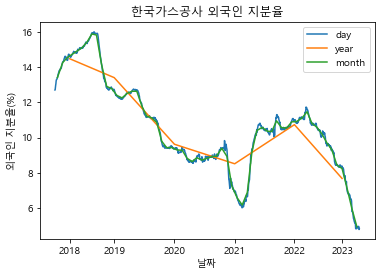

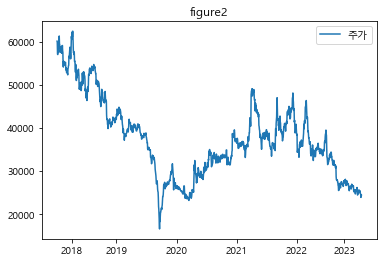

In [228]:
figure1 = plt.figure()
figure1.set_facecolor('white')
plt.title('한국가스공사 외국인 지분율')
x1 = df_all['일자'].values
y1 = df_all['외국인 지분율'].values
x2 = df_by_year['외국인 지분율'].index
y2 = df_by_year['외국인 지분율'].values
x3 = df_all.iloc[index]['일자'].values
y3 = df_by_month['외국인 지분율'].values
plt.plot(x1,y1,label = 'day')
plt.plot(['2018-10-01','2019-07-01','2020-07-01','2021-07-01','2022-07-01','2023-04-14'],y2,label = 'year')
plt.plot(x3,y3,label = 'month')
plt.xticks(['2018-10-01','2019-07-01','2020-07-01','2021-07-01','2022-07-01','2023-04-14'],['2018','2019','2020','2021','2022','2023'])
plt.xlabel('날짜')
plt.ylabel('외국인 지분율(%)')
plt.legend()
plt.rcParams['font.family'] = 'Malgun Gothic' # 모든 데이터 폰트 기본값 지정



# ========================================================================================================
figure2 = plt.figure()
figure2.set_facecolor('white')
plt.title('figure2')
x = df_all['일자'].values
y = df_all['종가'].values
plt.plot(x,y,label = '주가')
plt.xticks(['2018-10-01','2019-07-01','2020-07-01','2021-07-01','2022-07-01','2023-04-14'],['2018','2019','2020','2021','2022','2023'])
plt.legend()
plt.show()